In [1]:
# import relevant modules
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import time
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv('data/loan_data.csv')

In [3]:
loan

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Check any missing data in the dataframe:

In [7]:
loan.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [9]:
loan.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


#### Rename the columns:

In [10]:
cols_name=list()

In [11]:
for col in loan.columns:
    cols_name.append(col.replace('.','_'))
    

In [12]:
cols_name

['credit_policy',
 'purpose',
 'int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec',
 'not_fully_paid']

In [13]:
loan.columns = cols_name

In [14]:
loan.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


copy the dataframe for the last prediction:

In [15]:
#copy the dataframe for the last prediction

df_full_data = loan.copy()

<AxesSubplot:>

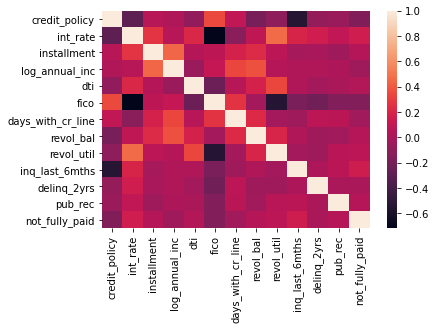

In [16]:
sns.heatmap(loan.corr())

<AxesSubplot:xlabel='purpose', ylabel='count'>

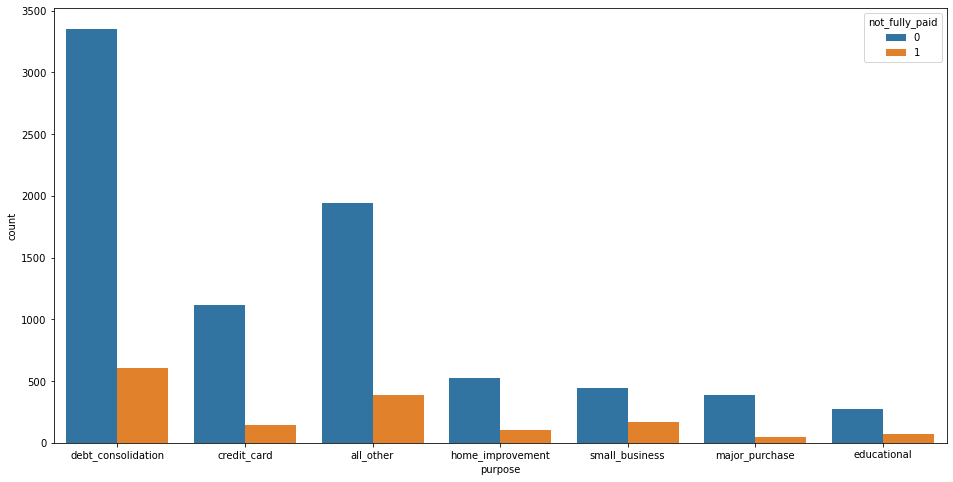

In [18]:
plt.subplots(figsize=(16,8))
sns.countplot('purpose',data=loan, hue='not_fully_paid')

<AxesSubplot:xlabel='purpose', ylabel='count'>

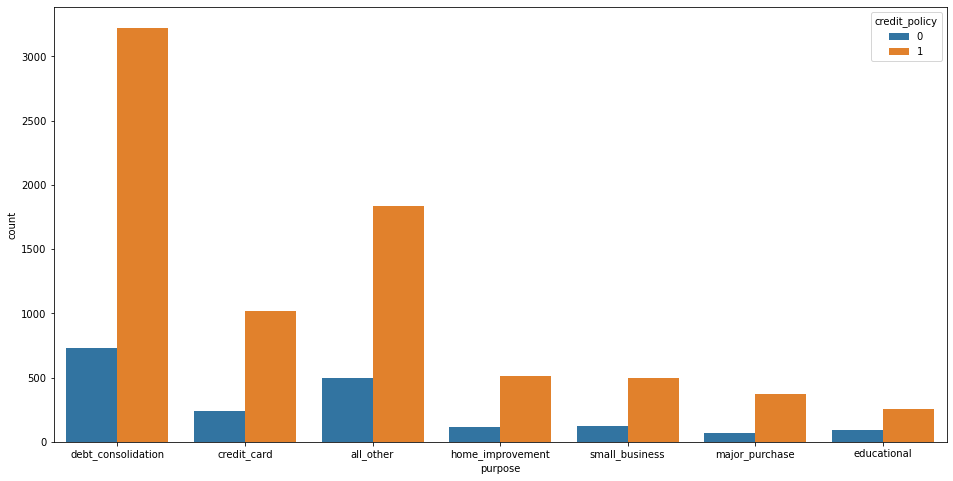

In [19]:
plt.subplots(figsize=(16,8))
sns.countplot('purpose',data=loan, hue='credit_policy')

In [20]:
loan.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Check the linearity of data:

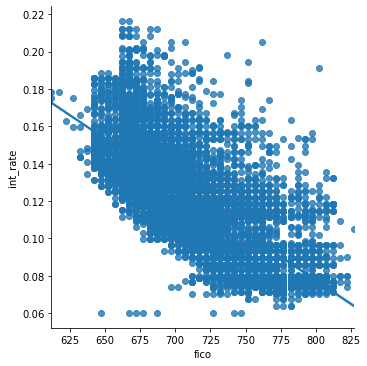

In [21]:
sns.lmplot(x='fico', y='int_rate', data=loan)

<AxesSubplot:xlabel='fico', ylabel='int_rate'>

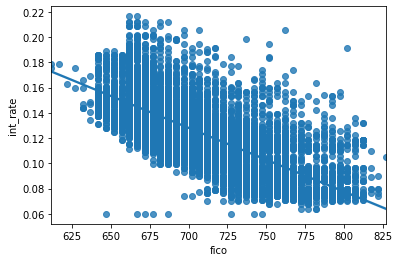

In [22]:
sns.regplot(x='fico', y='int_rate', data=loan)

### Exploratory Data Analysis:

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

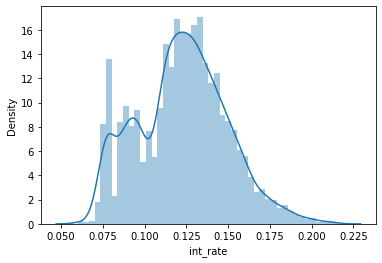

In [23]:
#examine the distribution of interest 
sns.distplot(loan['int_rate'])

(array([ 256., 1218., 1090., 2254., 2117., 1577.,  627.,  302.,  100.,
          37.]),
 array([0.06   , 0.07564, 0.09128, 0.10692, 0.12256, 0.1382 , 0.15384,
        0.16948, 0.18512, 0.20076, 0.2164 ]),
 <BarContainer object of 10 artists>)

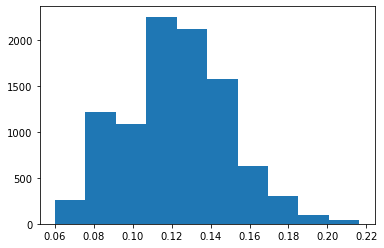

In [24]:
plt.hist(loan['int_rate'])

It seems that from the distribution plot. from the data we have, bimodal distribution.

<AxesSubplot:ylabel='Density'>

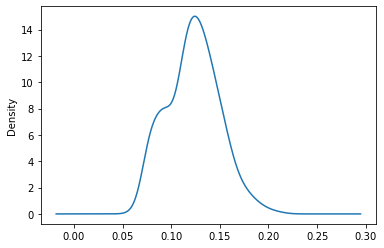

In [25]:
loan['int_rate'].plot.kde(bw_method=0.3)

<AxesSubplot:ylabel='Density'>

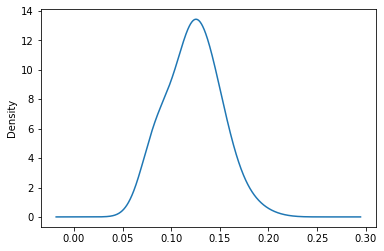

In [26]:
loan['int_rate'].plot.kde(bw_method=0.5)

To normalize the distribution, I used the kernal density estimate plot using Gaussian kernels. But the kde cannot use on the transformation to the target column

Text(0, 0.5, 'frequency')

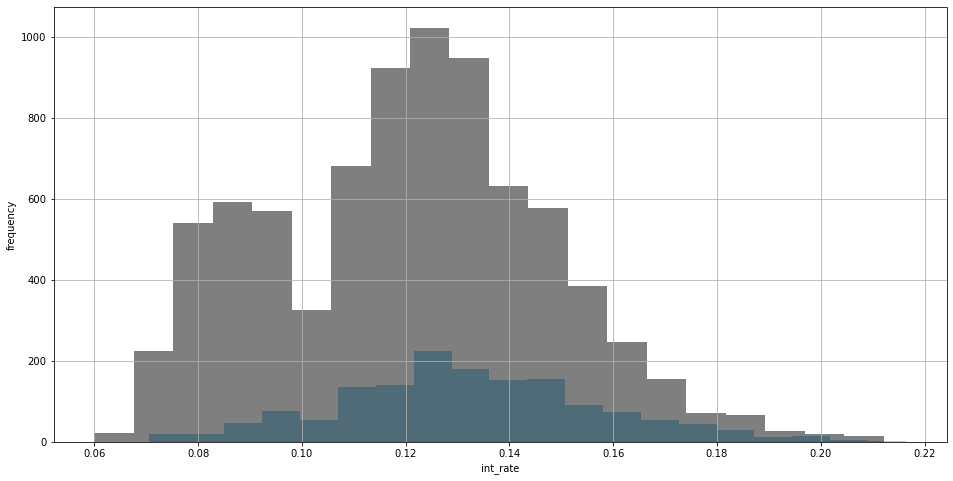

In [27]:
plt.figure(figsize = (16,8))
loan[loan['not_fully_paid'] == 1]['int_rate'].hist(alpha = 0.8, bins = 20, color = "skyblue")
loan[loan['not_fully_paid'] == 0]['int_rate'].hist(alpha = 0.5, bins = 20, color = "black")

plt.xlabel('int_rate')
plt.ylabel('frequency')

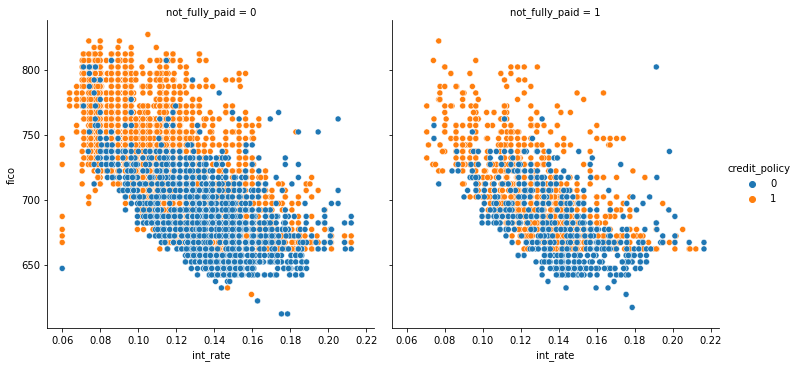

In [28]:
sns.relplot(
    data=loan,
    x="int_rate", y="fico", col="not_fully_paid",
    hue="credit_policy"
)

In [29]:
g = loan.fico.mean()

Text(0, 0.5, 'frequency')

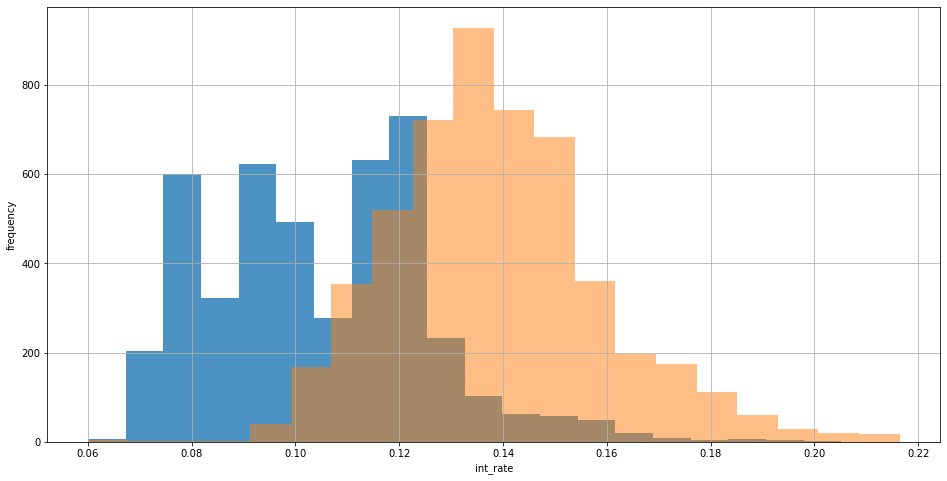

In [30]:
plt.figure(figsize = (16,8))
loan[loan['fico'] >= g]['int_rate'].hist( alpha = 0.8, bins = 20)
loan[loan['fico'] <= g]['int_rate'].hist( alpha = 0.5, bins = 20)

plt.xlabel('int_rate')
plt.ylabel('frequency')

#### Drop unnecessary columns:

Since we are going to predict the best interest rate for the debtors, we are going to take the data where the loan were fully paid. 

In [31]:
loan = loan.loc[loan['not_fully_paid']==0]

In [32]:
loan

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9561,0,all_other,0.0788,115.74,10.999095,10.17,722,4410.000000,11586,61.6,4,0,0,0
9562,0,debt_consolidation,0.1348,508.87,10.933107,17.76,717,3870.041667,8760,28.2,6,0,0,0
9564,0,all_other,0.1385,511.56,12.323856,12.33,687,6420.041667,385489,51.2,4,0,0,0
9567,0,all_other,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,0


In [33]:
loan.drop(columns=['purpose','not_fully_paid'], axis=1, inplace=True)

#### Handling the outliers:

In [35]:
dataset=loan['int_rate']
sorted(dataset)

Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1
print(IQR)

0.039099999999999996


In [36]:
dataset

0       0.1189
1       0.1071
2       0.1357
3       0.1008
4       0.1426
         ...  
9561    0.0788
9562    0.1348
9564    0.1385
9567    0.1311
9568    0.1979
Name: int_rate, Length: 8045, dtype: float64

In [37]:
df_loan = loan.loc[~((loan['int_rate'] < (Q1 - 1.5 * IQR)) |(loan['int_rate'] > (Q3 + 1.5 * IQR)))]
df_loan

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9560,0,0.1867,547.36,11.407565,15.76,667,10050.041670,13255,88.4,7,0,0
9561,0,0.0788,115.74,10.999095,10.17,722,4410.000000,11586,61.6,4,0,0
9562,0,0.1348,508.87,10.933107,17.76,717,3870.041667,8760,28.2,6,0,0
9564,0,0.1385,511.56,12.323856,12.33,687,6420.041667,385489,51.2,4,0,0


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

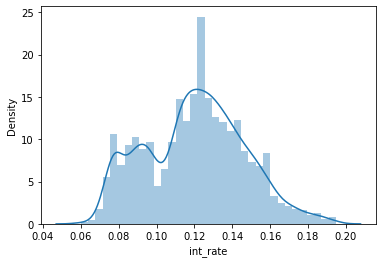

In [38]:
sns.distplot(df_loan['int_rate'])

Trying to separate the distplot:

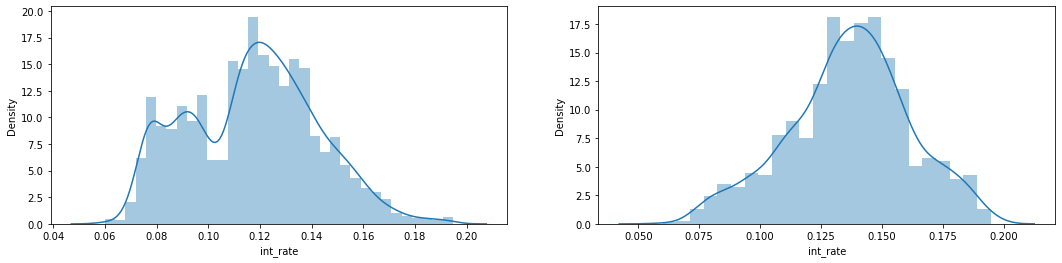

In [39]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
sns.distplot(df_loan.loc[(df_loan['credit_policy']==1)]['int_rate'], ax=ax[0])
sns.distplot(df_loan.loc[(df_loan['credit_policy']==0)]['int_rate'], ax=ax[1])
plt.show()

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

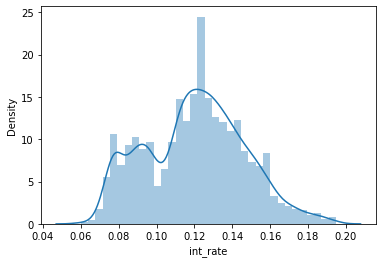

In [40]:
sns.distplot(df_loan['int_rate'])

#### Transform a non-normal distribution to a Gaussian distribution:

In [41]:
y_rate = (stats.rankdata(loan['int_rate'])/(len(loan['int_rate'])+1)- 0.5)*2
transform_rate = np.arctanh(y_rate)

In [42]:
# stats.rankdata?

<AxesSubplot:ylabel='Density'>

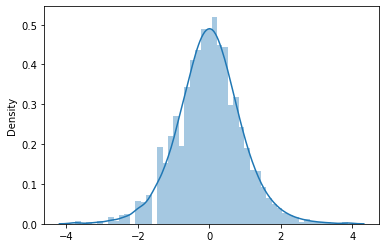

In [43]:
sns.distplot(transform_rate)

In [44]:
a= np.tanh(transform_rate)

In [45]:
b=((a/2)+0.5)*((len(a)+1))

<AxesSubplot:ylabel='Density'>

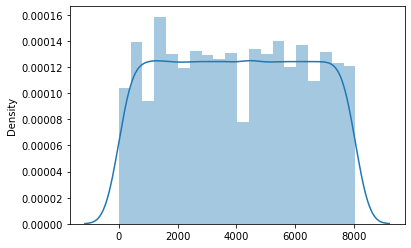

In [46]:
sns.distplot(b)

<AxesSubplot:ylabel='Density'>

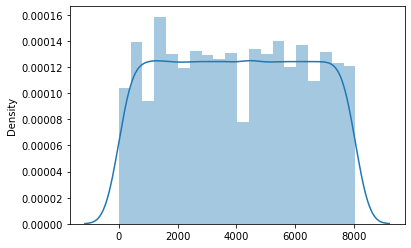

In [47]:
sns.distplot(stats.rankdata(loan['int_rate']))

We tried to retransform the data again into the original data. But it is failed. Hence, the formula can't be used.

#### Box-cox transformation:

Below are some common values for lambda:

1. lambda = -1. is a reciprocal transform.
2. lambda = -0.5 is a reciprocal square root transform.
3. lambda = 0.0 is a log transform.
4. lambda = 0.5 is a square root transform.
5. lambda = 1.0 is no transform.

source: https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/

In [48]:
# box-cox transform
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox
from matplotlib import pyplot

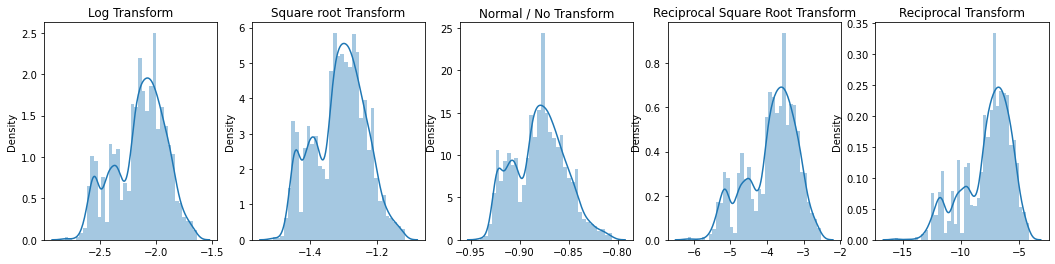

In [49]:
f, ax = plt.subplots(nrows=1, ncols=5, figsize= (18, 4))

sns.distplot(boxcox(df_loan['int_rate'], 0), ax=ax[0]).set_title('Log Transform')
sns.distplot(boxcox(df_loan['int_rate'], 0.5), ax=ax[1]).set_title('Square root Transform')
sns.distplot(boxcox(df_loan['int_rate'], 1), ax=ax[2]).set_title('Normal / No Transform')
sns.distplot(boxcox(df_loan['int_rate'], -0.5), ax=ax[3]).set_title('Reciprocal Square Root Transform')
sns.distplot(boxcox(df_loan['int_rate'], -1), ax=ax[4]).set_title('Reciprocal Transform')
plt.show()

Probability plot for above transforms:

Text(0.5, 1.0, 'Probplot after No transformation')

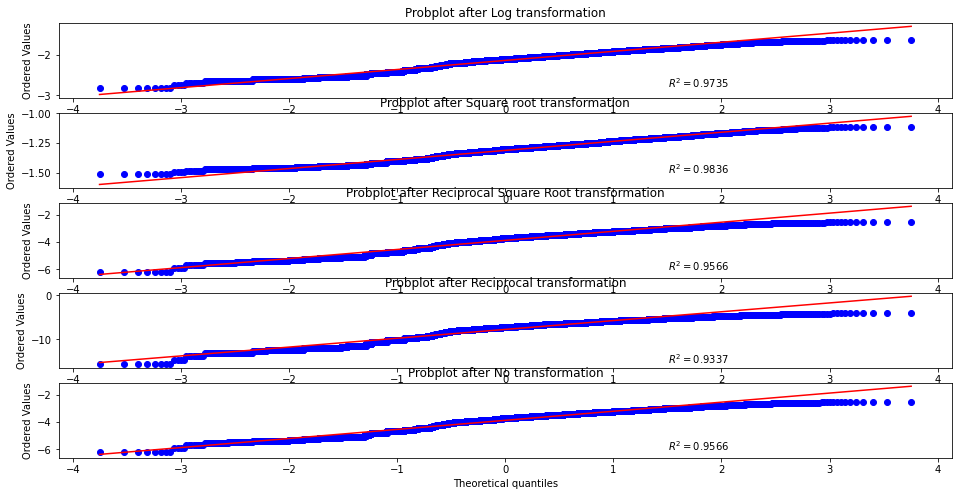

In [50]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(511)
x = df_loan['int_rate']
prob = stats.probplot(boxcox(df_loan['int_rate'], 0), dist="norm", fit=True, rvalue=True, plot=ax1)
ax1.set_title('Probplot after Log transformation')
ax2 = fig.add_subplot(512)
prob = stats.probplot(boxcox(df_loan['int_rate'], 0.5), dist="norm", fit=True, rvalue=True, plot=ax2)
ax2.set_title('Probplot after Square root transformation')
ax3 = fig.add_subplot(513)
prob = stats.probplot(boxcox(df_loan['int_rate'], -0.5), dist="norm", fit=True, rvalue=True, plot=ax3)
ax3.set_title('Probplot after Reciprocal Square Root transformation')
ax4 = fig.add_subplot(514)
prob = stats.probplot(boxcox(df_loan['int_rate'], -1), dist="norm", fit=True, rvalue=True, plot=ax4)
ax4.set_title('Probplot after Reciprocal transformation')
ax5 = fig.add_subplot(515)
prob = stats.probplot(boxcox(df_loan['int_rate'], -0.5), dist="norm", fit=True, rvalue=True, plot=ax5)
ax5.set_title('Probplot after No transformation')

Using Yeo-Johnson, and boxcox. Check the probabiity plot:

Text(0.5, 1.0, 'Probplot after Yeo-Johnson transformation')

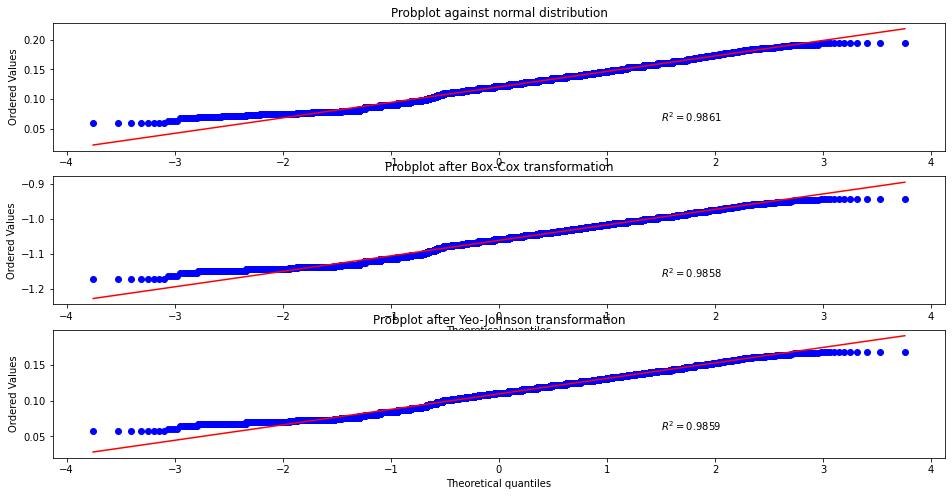

In [51]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(311)
x = df_loan['int_rate']
prob = stats.probplot(x, dist=stats.norm, plot=ax1, rvalue=True)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(312)
xt, _ = stats.boxcox(df_loan['int_rate'])
prob = stats.probplot(xt, dist=stats.norm, plot=ax2, rvalue=True)
ax2.set_title('Probplot after Box-Cox transformation')
ax3 = fig.add_subplot(313)
xt_yeo, lmbda = stats.yeojohnson(df_loan['int_rate'])
prob = stats.probplot(xt_yeo, dist=stats.norm, plot=ax3, rvalue=True)
ax3.set_title('Probplot after Yeo-Johnson transformation')

Distributions plot comparison:(using yeo-johnson and boxcox)

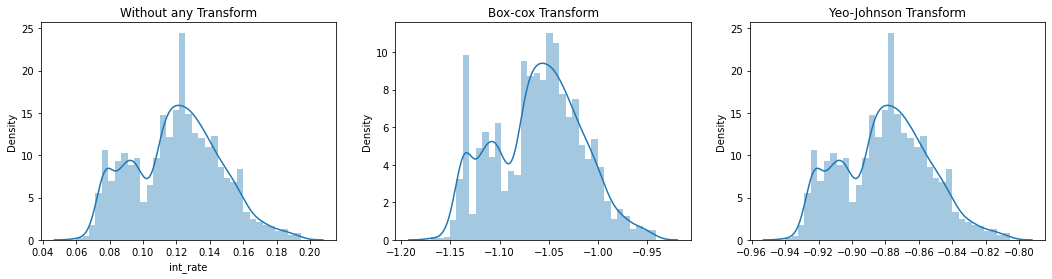

In [52]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize= (18, 4))

sns.distplot(df_loan['int_rate'], ax=ax[0]).set_title('Without any Transform')
sns.distplot(xt, ax=ax[1]).set_title('Box-cox Transform')
sns.distplot(boxcox(df_loan['int_rate'], 1), ax=ax[2]).set_title('Yeo-Johnson Transform')
plt.show()

#### Target decided:

I choose the the square root transform of df_loan['int_rate'] as our target compared to other transformations. As from the analysis, although the R^2 probability plot is slightly lower than the original data. But its normal distribution has better shape compared to others. 

In [53]:
df_loan['bc_int_rate'] = boxcox(df_loan['int_rate'], 0.5)

In [54]:
df_loan.drop(columns='int_rate', inplace=True)

### Machine Learning

In [55]:
x = df_loan.columns.difference(['bc_int_rate'])

In [56]:
x

Index(['credit_policy', 'days_with_cr_line', 'delinq_2yrs', 'dti', 'fico',
       'inq_last_6mths', 'installment', 'log_annual_inc', 'pub_rec',
       'revol_bal', 'revol_util'],
      dtype='object')

In [57]:
# Splitting the data - use 80% of the data for training
train_x,test_x,train_y,test_y=train_test_split(df_loan[x],
                                              df_loan['bc_int_rate'],
                                              test_size=0.3,
                                              random_state=42)

In [58]:
print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

5607
2404
5607
2404


#### Feature selection by random forest and GridSearch CV:

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [61]:
# Use GridSearchCV with a RandomForestRegressor
param_grid={'n_estimators':np.arange(20,50)}

tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2)
tree.fit(train_x,train_y) 

GridSearchCV(cv=2, estimator=RandomForestRegressor(warm_start=True),
             param_grid={'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [62]:
tree.best_params_

{'n_estimators': 46}

In [63]:
# Fit to model
Forest_credit=RandomForestRegressor(oob_score=True,n_estimators=46)

In [64]:
Forest_credit.fit( train_x, train_y)

RandomForestRegressor(n_estimators=46, oob_score=True)

In [65]:
Forest_credit.oob_score_

0.7393845392780456

<AxesSubplot:xlabel='importance', ylabel='feature'>

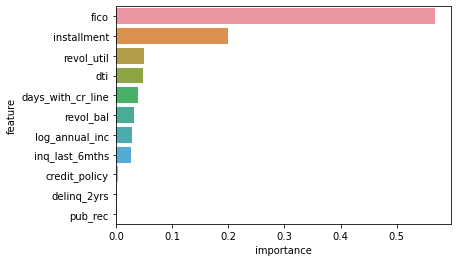

In [66]:
indices = np.argsort(Forest_credit.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         Forest_credit.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [67]:
feature_rank.feature.values

array(['fico', 'installment', 'revol_util', 'dti', 'days_with_cr_line',
       'revol_bal', 'log_annual_inc', 'inq_last_6mths', 'credit_policy',
       'delinq_2yrs', 'pub_rec'], dtype=object)

In [68]:
feature_rank

,rank,feature,importance
0,1,fico,0.567959
1,2,installment,0.199050
2,3,revol_util,0.050399
3,4,dti,0.047637
4,5,days_with_cr_line,0.039629
5,6,revol_bal,0.032728
6,7,log_annual_inc,0.029433
7,8,inq_last_6mths,0.026365
8,9,credit_policy,0.003198
9,10,delinq_2yrs,0.002262


In [69]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [70]:
feature_taken = feature_rank.feature.values

In [71]:
#gather features
features = "+".join(feature_taken)

In [72]:
features

'fico+installment+revol_util+dti+days_with_cr_line+revol_bal+log_annual_inc+inq_last_6mths+credit_policy+delinq_2yrs+pub_rec'

In [73]:
y, X = dmatrices('bc_int_rate~' + features,df_loan, return_type='dataframe')

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.

Variance inflation factor (VIF) is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.

In [74]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [75]:
vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
0,1188.772075,Intercept
1,2.090696,fico
3,1.785125,revol_util
9,1.615376,credit_policy
7,1.530966,log_annual_inc
6,1.437371,revol_bal
8,1.414078,inq_last_6mths
5,1.295687,days_with_cr_line
2,1.266264,installment
4,1.217234,dti


It seems that every columns has low VIF values.

#### Calculate p-values:

In [76]:
from scipy import stats
from scipy.stats import pearsonr

In [77]:
#function calculate p-values
def calculate_pvalues(df):
    df = df.select_dtypes(include=['number'])
    pairs = pd.MultiIndex.from_product([df.columns, df.columns])
    pvalues = [pearsonr(df[a], df[b])[1] for a, b in pairs]
    pvalues = pd.Series(pvalues, index=pairs).unstack().round(4)
    return pvalues

In [78]:
p_cal=calculate_pvalues(df_loan)

In [79]:
p_cal

,bc_int_rate,credit_policy,days_with_cr_line,delinq_2yrs,dti,fico,inq_last_6mths,installment,log_annual_inc,pub_rec,revol_bal,revol_util
bc_int_rate,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0014,0.0000,0.0000,0.0000
credit_policy,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
days_with_cr_line,0.0000,0.0,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001
delinq_2yrs,0.0000,0.0,0.0000,0.0000,0.1744,0.0000,0.0362,0.5388,0.0031,0.0942,0.0005,0.0006
dti,0.0000,0.0,0.0001,0.1744,0.0000,0.0000,0.0114,0.0000,0.0000,0.6523,0.0000,0.0000
fico,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0536,0.0000
inq_last_6mths,0.0000,0.0,0.0000,0.0362,0.0114,0.0000,0.0000,0.1588,0.0401,0.0000,0.8243,0.1992
installment,0.0000,0.0,0.0000,0.5388,0.0000,0.0000,0.1588,0.0000,0.0000,0.0010,0.0000,0.0000
log_annual_inc,0.0014,0.0,0.0000,0.0031,0.0000,0.0000,0.0401,0.0000,0.0000,0.0938,0.0000,0.0001
pub_rec,0.0000,0.0,0.0000,0.0942,0.6523,0.0000,0.0000,0.0010,0.0938,0.0000,0.0027,0.0000


In [80]:
# Dropping variables one at a time which have p-values greater than 5%
feature_filtered=p_cal.loc[p_cal.loc['bc_int_rate']<0.05]

All the columns have low p-values which are less than 5%.

with all the analysis, the features selected for data training are:

In [81]:
feature_columns= feature_rank['feature'][:5]

In [82]:
feature_columns

0                 fico
1          installment
2           revol_util
3                  dti
4    days_with_cr_line
Name: feature, dtype: object

In [83]:
df_loan.columns

Index(['credit_policy', 'installment', 'log_annual_inc', 'dti', 'fico',
       'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths',
       'delinq_2yrs', 'pub_rec', 'bc_int_rate'],
      dtype='object')

## Build a model:

#### Split train and test data:

In [84]:
# split training and test sets
X_train,X_test,y_train,y_test=train_test_split(df_loan[feature_columns],
                                              df_loan['bc_int_rate'],
                                               test_size=.3,
                                               random_state=42)

### 1. Build Linear Regression model:

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
from sklearn import model_selection

In [87]:
X = df_loan[feature_columns]
y = df_loan['bc_int_rate']

In [88]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [89]:
y_pred = linreg.predict(X_test)
print("The Mean Square error value:{}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

The Mean Square error value:0.04556655890313888


#### Evaluate the model accuracy by using Kfold :

In [90]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [91]:
time_taken = []
mse_values = []
mae_values = []
rmse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    time_start = time.time()
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    time_end = round(time.time() - time_start, 3)
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    mae_values.append(metrics.mean_absolute_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index]))))
    time_taken.append(time_end)
    
    n += 1
        
    print('Model {}'.format(n))
    print('Time taken: {}s'.format(time_end))
    print('MAE: {}'.format(mae_values[n-1]))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Average time taken: {}s'.format(np.mean(time_taken)))
print('Mean of MAE for all folds: {}'.format(np.mean(mae_values)))
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))
#assign the values into a set
lr_model = {'model_name':'LinearReg', 'MAE':np.mean(mae_values), 'MSE':np.mean(mse_values), 'RMSE':np.mean(rmse_values), 'R2':np.mean(scores), 'time_taken':np.mean(time_taken)}

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Time taken: 0.006s
MAE: 0.03278412315603858
MSE: 0.0019547177624913608
RMSE: 0.044212190202379265
R2: 0.6603807019218407

Model 2
Time taken: 0.007s
MAE: 0.034614039230514655
MSE: 0.002146012898260228
RMSE: 0.046325078502472375
R2: 0.6604260474332717

Model 3
Time taken: 0.008s
MAE: 0.03339877846187575
MSE: 0.0019818000392342705
RMSE: 0.04451741276438098
R2: 0.6604360870603642

Model 4
Time taken: 0.008s
MAE: 0.03285689939294416
MSE: 0.0019190812493146362
RMSE: 0.04380731958605361
R2: 0.6604827580462176

Model 5
Time taken: 0.01s
MAE: 0.033350621280476424
MSE: 0.0019287817923723247
RMSE: 0.04391789831460887
R2: 0.6604734732377378

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Average time taken: 0.0078s
Mean of MAE for all folds: 0.03340089230436992
Mean of MSE for all folds: 0.001986078748334564
Mean of RMSE for all folds: 0.04455597987397902
Mean of R2 for all folds: 0.6604398135398863


### 2. Build Regression model using Random Forest:

In [94]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 46, random_state = 123)
# Train the model on training data
rf.fit(X_train, y_train);

#### Evaluate the model accuracy by using Kfold:

In [95]:
time_taken = []
mse_values = []
mae_values = []
rmse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    time_start = time.time()
    rf_model = rf.fit(X.iloc[train_index], y.iloc[train_index])
    time_end = round(time.time() - time_start,3)
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], rf_model.predict(X.iloc[test_index])))
    scores.append(rf_model.score(X, y))
    mae_values.append(metrics.mean_absolute_error(y.iloc[test_index], rf_model.predict(X.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], rf_model.predict(X.iloc[test_index]))))
    time_taken.append(time_end)
    
    n += 1
        
    print('Model {}'.format(n))
    print('Time taken: {}s'.format(time_end))
    print('MAE: {}'.format(mae_values[n-1]))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Average time taken: {}s'.format(np.mean(time_taken)))
print('Mean of MAE for all folds: {}'.format(np.mean(mae_values)))
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

#assign the values into a set
rf_model = {'model_name':'RandomForest', 'MAE':np.mean(mae_values), 'MSE':np.mean(mse_values), 'RMSE':np.mean(rmse_values), 'R2':np.mean(scores), 'time_taken':np.mean(time_taken)}

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Time taken: 2.508s
MAE: 0.026185321626897292
MSE: 0.0015112912584618516
RMSE: 0.038875329689429666
R2: 0.9179195789426482

Model 2
Time taken: 2.386s
MAE: 0.02511358119545249
MSE: 0.0013773014733291355
RMSE: 0.03711201252059952
R2: 0.9226954062681755

Model 3
Time taken: 2.31s
MAE: 0.025439327475986307
MSE: 0.0014962483487909626
RMSE: 0.03868136953096365
R2: 0.9199501425713957

Model 4
Time taken: 2.491s
MAE: 0.027161873213885815
MSE: 0.0016233342359051816
RMSE: 0.04029062218314805
R2: 0.9146786784205945

Model 5
Time taken: 2.465s
MAE: 0.02602602069013505
MSE: 0.0015060252910757414
RMSE: 0.038807541677820065
R2: 0.9187290994554079

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Average time taken: 2.432s
Mean of MAE for all folds: 0.025985224840471388
Mean of MSE for all folds: 0.0015028401215125744
Mean of RMSE for all folds: 0.03875337512039219
Mean of R2 for all folds: 0.9187945811316445


### 3. Build Regression model using XGBRegressor:

In [96]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [97]:
xgbr = xgb.XGBRegressor(verbosity=0)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=100, n_jobs=1, nthread=None, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             tree_method=None, validate_parameters=None, verbosity=1)

In [98]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [126]:
y_pred = xgbr.predict(X_test)

#### Evaluate the model accuracy by using Kfold:

In [99]:
time_taken = []
mse_values = []
mae_values = []
rmse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    #lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    xgbr = xgb.XGBRegressor(verbosity=0)
    time_start = time.time()
    xgbr.fit(X.iloc[train_index], y.iloc[train_index])
    time_end = round(time.time() - time_start,3)
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], xgbr.predict(X.iloc[test_index])))
    scores.append(xgbr.score(X, y))
    mae_values.append(metrics.mean_absolute_error(y.iloc[test_index], xgbr.predict(X.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], xgbr.predict(X.iloc[test_index]))))
    time_taken.append(time_end)
    
    n += 1
        
    print('Model {}'.format(n))
    print('Time taken: {}s'.format(time_end))
    print('MAE: {}'.format(mae_values[n-1]))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))



print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Average time taken: {}s'.format(np.mean(time_taken)))
print('Mean of MAE for all folds: {}'.format(np.mean(mae_values)))
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

#assign the values into a set
xgbr_model = {'model_name':'XGBR', 'MAE':np.mean(mae_values), 'MSE':np.mean(mse_values), 'RMSE':np.mean(rmse_values), 'R2':np.mean(scores), 'time_taken':np.mean(time_taken)}

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Time taken: 0.865s
MAE: 0.026929624442657462
MSE: 0.0014718001890912484
RMSE: 0.03836404813221942
R2: 0.8925399015477766

Model 2
Time taken: 1.0s
MAE: 0.026459506423382097
MSE: 0.0014941759913401666
RMSE: 0.038654572709320774
R2: 0.891963255297537

Model 3
Time taken: 0.929s
MAE: 0.026593363264131756
MSE: 0.0014494875734631992
RMSE: 0.0380721364446914
R2: 0.8922365218386307

Model 4
Time taken: 0.917s
MAE: 0.02736732618099172
MSE: 0.001607197833291899
RMSE: 0.04008987195404718
R2: 0.8878378040262954

Model 5
Time taken: 0.867s
MAE: 0.025295230801422763
MSE: 0.0013570455612952658
RMSE: 0.03683809931708293
R2: 0.8962577784890258

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Average time taken: 0.9156000000000001s
Mean of MAE for all folds: 0.026529010222517156
Mean of MSE for all folds: 0.001475941429696356
Mean of RMSE for all folds: 0.03840374571147234
Mean of R2 for all folds: 0.892167052239853


### Choose the best model for our data:

In [100]:
df_model = pd.DataFrame(columns = ['model_name', 'MAE', 'MSE', 'RMSE', 'R2', 'time_taken'])

In [101]:
df_model = df_model.append(xgbr_model, ignore_index=True)

In [102]:
df_model = df_model.append(rf_model, ignore_index=True)

In [103]:
df_model = df_model.append(lr_model, ignore_index=True)

In [104]:
df_model

,model_name,MAE,MSE,RMSE,R2,time_taken
0,XGBR,0.026529,0.001476,0.038404,0.892167,0.9156
1,RandomForest,0.025985,0.001503,0.038753,0.918795,2.4320
2,LinearReg,0.033401,0.001986,0.044556,0.660440,0.0078


<AxesSubplot:xlabel='model_name', ylabel='time_taken'>

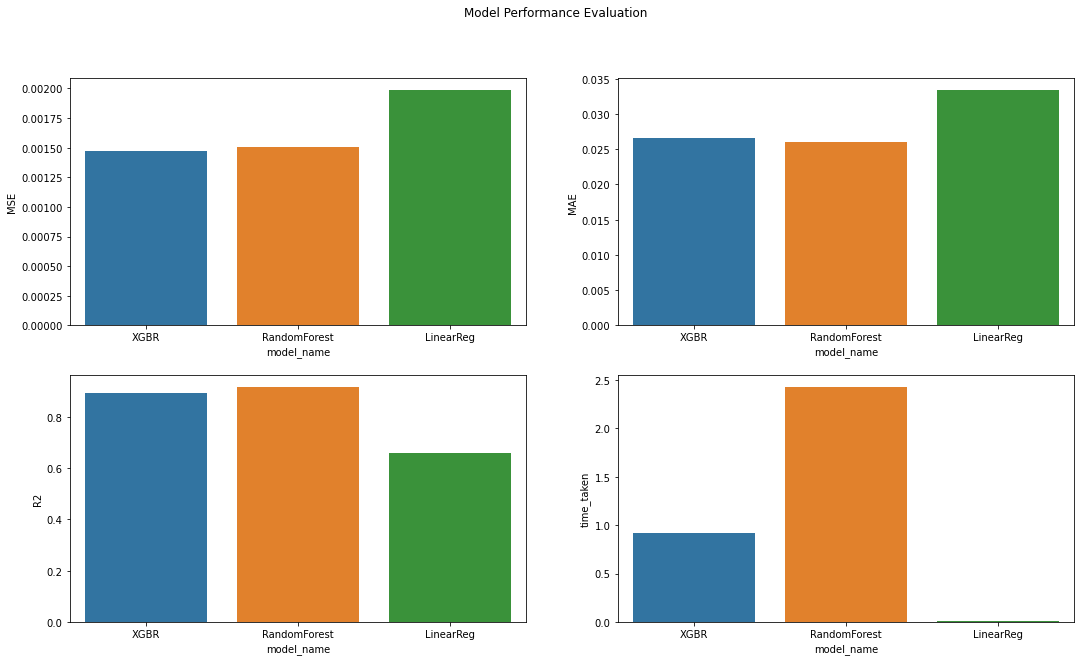

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Model Performance Evaluation')

sns.barplot(ax=axes[0, 0], data=df_model, x='model_name', y='MSE')
sns.barplot(ax=axes[0, 1], data=df_model, x='model_name', y='MAE')
sns.barplot(ax=axes[1, 0], data=df_model, x='model_name', y='R2')
sns.barplot(ax=axes[1, 1], data=df_model, x='model_name', y='time_taken')

The model chosen for the predicting the interest rate is XGBR. Because of its MSE has the lowest value and time taken which is the better than Random Forest Regressor.

### Predicting the interest rate:

In [107]:
X.columns.values

array(['fico', 'installment', 'revol_util', 'dti', 'days_with_cr_line'],
      dtype=object)

In [108]:
df_full_data[X.columns]

,fico,installment,revol_util,dti,days_with_cr_line
0,737,829.10,52.1,19.48,5639.958333
1,707,228.22,76.7,14.29,2760.000000
2,682,366.86,25.6,11.63,4710.000000
3,712,162.34,73.2,8.10,2699.958333
4,667,102.92,39.5,14.97,4066.000000
...,...,...,...,...,...
9573,672,344.76,82.1,10.39,10474.000000
9574,722,257.70,1.1,0.21,4380.000000
9575,687,97.81,82.9,13.09,3450.041667
9576,692,351.58,3.2,19.18,1800.000000


In [109]:
#predict the data and inverse the boxcox transformation before store it into a column
from scipy.special import boxcox, inv_boxcox

int_rate_pred = xgbr.predict(df_full_data[X.columns])
int_rate_pred = inv_boxcox(int_rate_pred, 0.5)
int_rate_pred=pd.DataFrame(int_rate_pred.tolist())
int_rate_pred.columns = ['int_rate_pred']


In [110]:
len(int_rate_pred)

9578

In [111]:
len(df_full_data)

9578

In [112]:
int_rate_pred.isnull().sum()

int_rate_pred    0
dtype: int64

In [113]:
df_full_data.reset_index(drop=True, inplace=True)
int_rate_pred.reset_index(drop=True, inplace=True)

In [114]:
final_loan=pd.concat([df_full_data, int_rate_pred], axis=1)

In [115]:
final_loan

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,int_rate_pred
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.116518
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0.117487
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.139429
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.109088
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0.136487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0.139599
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0.126574
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0.118145
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0.149327
